# RNN Forecasting for IBM Stock

In [1]:
import sys
import os

In [2]:
sys.path.append(os.path.abspath("../src"))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from rnn_forecasting import RNNForecaster
from preprocessing import Preprocessor

## 1. Data Preprocessing

In [4]:
preprocessor = Preprocessor("../data/raw/IBM_Stock_1980_2025.csv")

df = preprocessor.load_data()
df = preprocessor.add_features()

train, test = preprocessor.split(test_size=0.2)

df.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Adj Factor,Daily_Return,Cumulative_Return,SMA_30,SMA_100,EMA_30,EMA_100,Volatility_30d,BB_Mid,BB_Upper,BB_Lower
Date,,,,,,,,,,,,,,,,,,,
2025-07-24,261.250000,262.049988,252.750000,260.510010,260.510010,22647700,0.0,0.0,1.0,-0.076238,268.722515,285.320334,259.747270,280.563528,263.605410,0.017962,285.837503,300.414279,271.260727
2025-07-25,260.019989,260.799988,256.350006,259.720001,259.720001,7758700,0.0,0.0,1.0,-0.003033,267.904569,284.593668,259.859437,279.218785,263.528472,0.017523,284.227003,302.594152,265.859855
2025-07-28,260.299988,264.000000,259.609985,263.209991,263.209991,5192500,0.0,0.0,1.0,0.013438,271.517977,283.999667,259.976507,278.185959,263.522165,0.017764,282.902502,303.314561,262.490444
2025-07-29,264.299988,265.799988,261.019989,262.410004,262.410004,4627300,0.0,0.0,1.0,-0.003039,270.689699,283.506001,260.104052,277.168156,263.500142,0.017632,281.284003,302.832354,259.735651
2025-07-30,261.600006,262.000000,258.899994,260.260010,260.260010,3718300,0.0,0.0,1.0,-0.008193,268.463674,282.787002,260.236517,276.077308,263.435981,0.017323,279.737003,302.684959,256.789047


## 2. LSTM Forecasting

In [5]:
lstm_forecaster = RNNForecaster(
    model_type="lstm",
    hidden_size=64,
    num_layers=2,
    window_size=20,
    batch_size=32
)
lstm_forecaster.prepare_data(train, test)
lstm_forecaster.train(epochs=50, lr=0.001)
lstm_predictions = lstm_forecaster.predict()

metrics = lstm_forecaster.evaluate(test.iloc[-len(lstm_predictions):], lstm_predictions)

rmse = metrics["rmse"]
mae = metrics["mae"]
mape = metrics["mape"]

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


lstm_forecaster.plot_forecast(test.iloc[-len(lstm_predictions):], lstm_predictions, title="LSTM Forecast vs Actual")


c:\Users\clemm\Documents\Personnal Projects\ibm-stock-prices\src\preprocessing.py:149: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\b\abs_34s6o8i12c\croot\libtorch_1751464457133\work\torch\csrc\utils\tensor_new.cpp:257.)
  self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)


ValueError: LSTM: Expected input to be 2D or 3D, got 4D instead

## 2. LightGBM Forecasting

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7058
[LightGBM] [Info] Number of data points in the train set: 9091, number of used features: 29
[LightGBM] [Info] Start training from score 33.190033
RMSE: 42.44
MAE: 18.29
MAPE: 8.96%


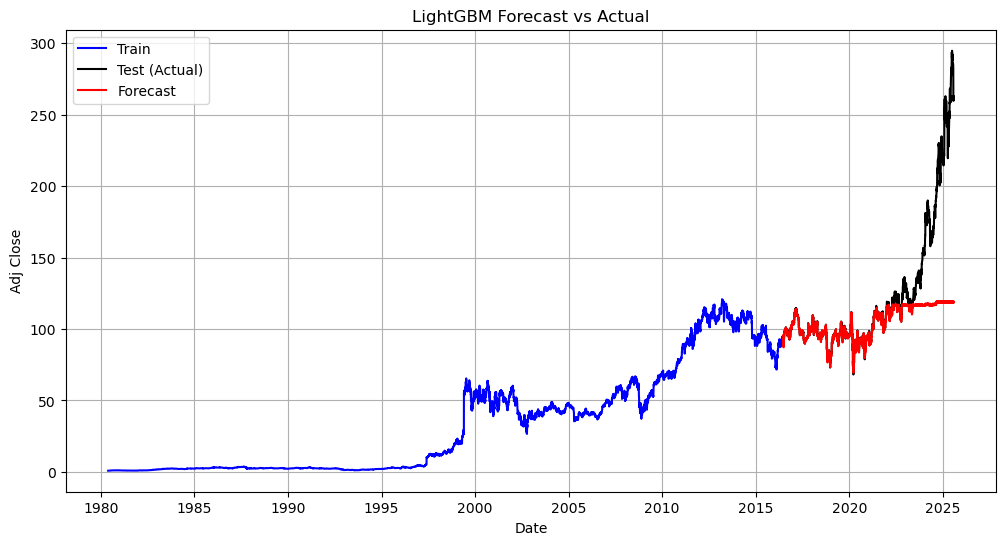

In [ ]:
lgbm_forecaster = RNNForecaster(
    model_type="lstm",
    hidden_size=64,
    num_layers=2,
    window_size=20,
    batch_size=32
)
lgbm_forecaster.prepare_data(train, test)
lgbm_forecaster.train(epochs=50, lr=0.001)
lstm_predictions = lgbm_forecaster.predict()

metrics = lgbm_forecaster.evaluate(test.iloc[-len(lstm_predictions):], lstm_predictions)

rmse = metrics["rmse"]
mae = metrics["mae"]
mape = metrics["mape"]

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


lgbm_forecaster.plot_forecast(test.iloc[-len(lstm_predictions):], lstm_predictions, title="LSTM Forecast vs Actual")